In [16]:
import pandas as pd
import matplotlib.pyplot as plt
# Import necessary scripts
from scripts.data_quality_checks import (
    load_dataset, handle_anomalies
)

In [17]:
# Load the datasets
df_benin = load_dataset('data/benin-malanville.csv')

In [18]:
# Handle anomalies in the dataset
handle_anomalies(
    df_benin,
    negative_value_columns=['GHI', 'DNI', 'DHI'],
    outlier_columns=['ModA', 'ModB', 'WS', 'WSgust'],
    lower_percentile=0.05,
    upper_percentile=0.95
)


Missing Values in Each Column:


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


Summary Statistics after Data Quality Check:


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,241.958821,167.441866,116.993033,234.003061,225.893785,28.179683,54.487969,2.070410,2.740132,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736
std,330.101787,261.547532,157.463619,321.172058,309.856311,5.924297,28.073069,1.468952,1.844866,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743
min,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000
50%,1.800000,0.000000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000
max,1413.000000,952.300000,759.200000,909.400000,878.000000,43.800000,100.000000,5.000000,6.400000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000


In [19]:
# Convert the Timestamp column to datetime
df_benin['Timestamp'] = pd.to_datetime(df_benin['Timestamp'])

# Set the Timestamp as the index
df_benin.set_index('Timestamp', inplace=True)

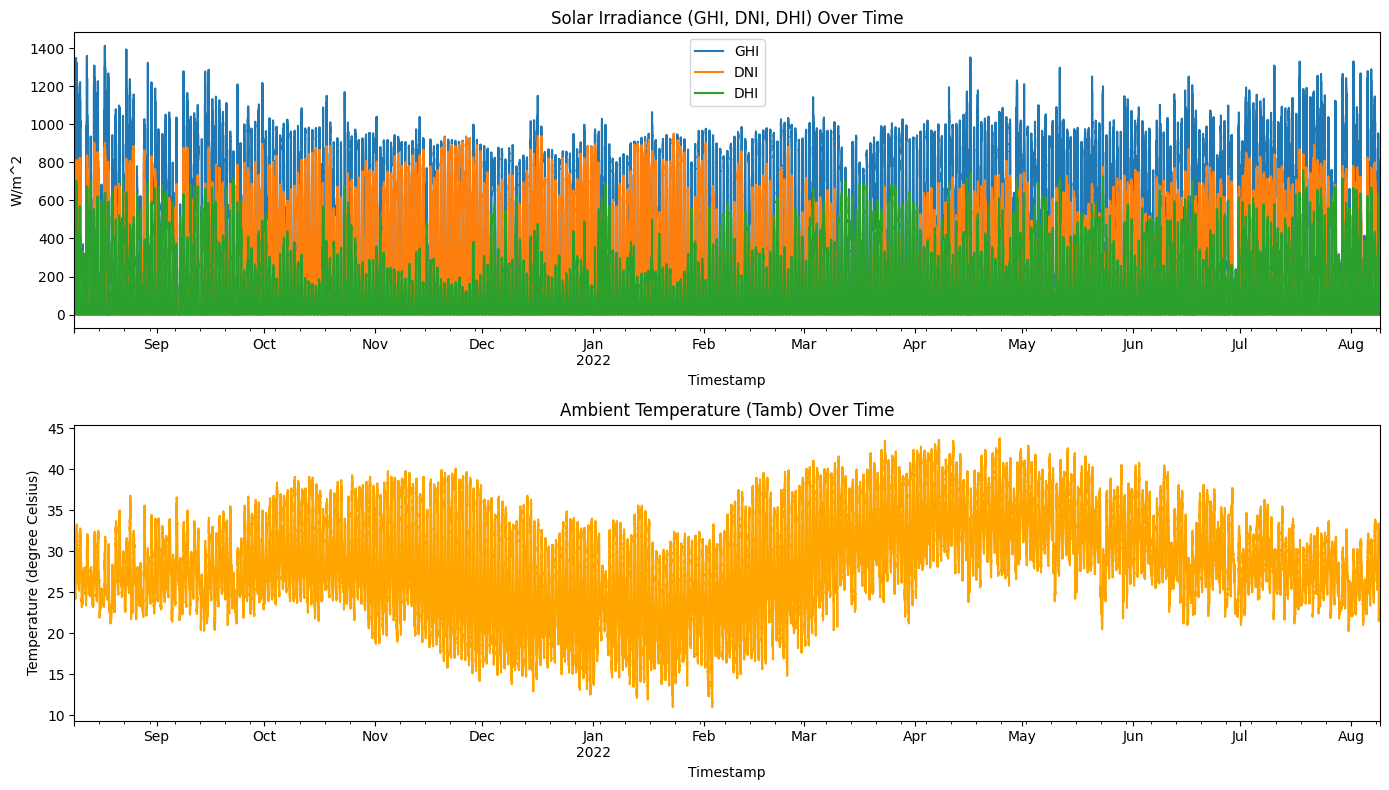

In [20]:
# Plotting GHI, DNI, DHI over time
plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
df_benin[['GHI', 'DNI', 'DHI']].plot(ax=plt.gca(), title='Solar Irradiance (GHI, DNI, DHI) Over Time')
plt.ylabel('W/m^2')

plt.subplot(2, 1, 2)
df_benin['Tamb'].plot(ax=plt.gca(), color='orange', title='Ambient Temperature (Tamb) Over Time')
plt.ylabel('Temperature (degree Celsius)')

plt.tight_layout()
plt.show()

### Evaluating the Impact of Cleaning on Sensor Readings (ModA, ModB)

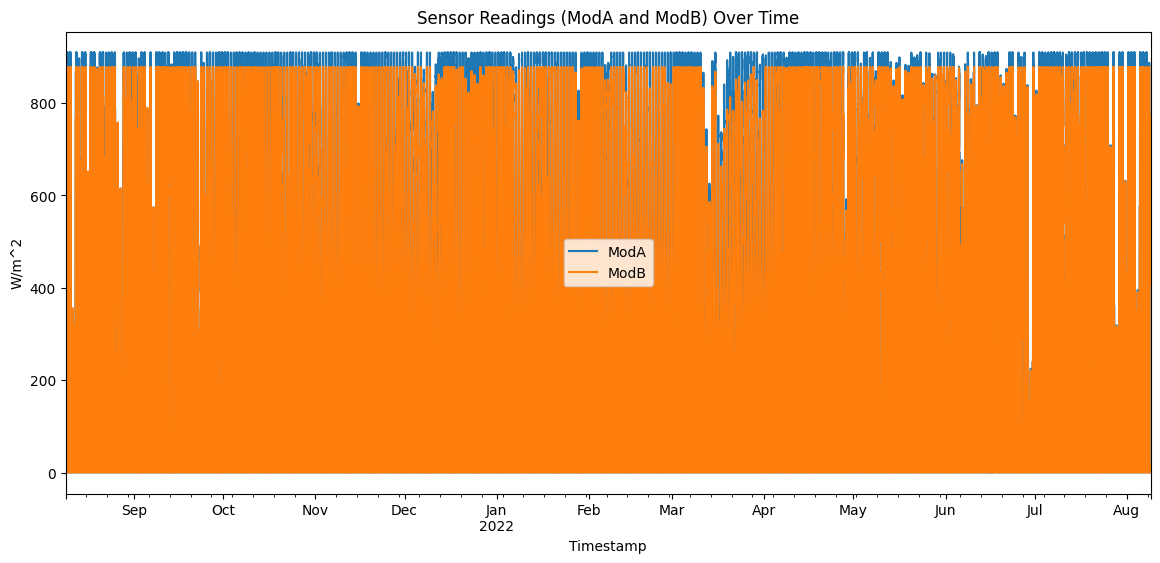

In [21]:
# Plot ModA and ModB over time
plt.figure(figsize=(14, 6))

df_benin[['ModA', 'ModB']].plot(ax=plt.gca(), title='Sensor Readings (ModA and ModB) Over Time')
plt.ylabel('W/m^2')
plt.show()

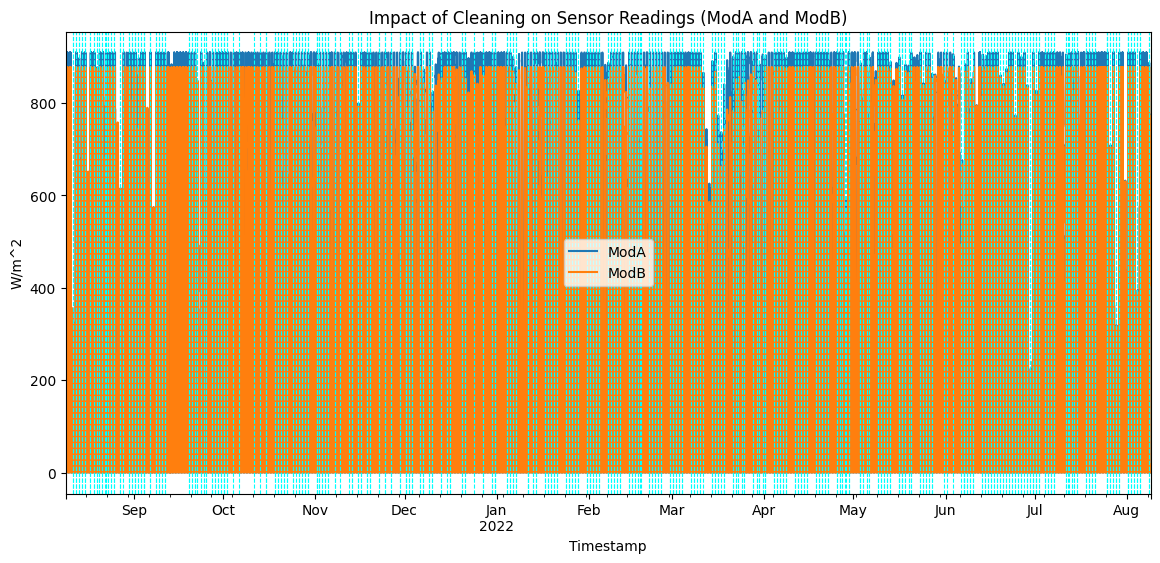

In [14]:
# Plot ModA and ModB with Cleaning events marked
plt.figure(figsize=(14, 6))

df_benin[['ModA', 'ModB']].plot(ax=plt.gca(), title='Impact of Cleaning on Sensor Readings (ModA and ModB)')
plt.ylabel('W/m^2')

# Mark cleaning events
cleaning_times = df_benin[df_benin['Cleaning'] == 1].index
for cleaning_time in cleaning_times:
    plt.axvline(x=cleaning_time, color='cyan', linestyle='--', linewidth=0.8)

plt.show()

## Key Findings from Time Series Analysis and Cleaning Impact

### 1. **Solar Irradiance (GHI, DNI, DHI) and Temperature (Tamb) Over Time**
- **Seasonal Patterns:** Solar irradiance (GHI, DNI, DHI) and ambient temperature (Tamb) display clear seasonal trends. Solar irradiance peaks during the warmer months, while temperature fluctuates with expected seasonal changes.
- **Daily Trends:** There are consistent daily variations in solar irradiance, with typical increases during daylight hours and decreases during the night, although this is not explicitly visible in the aggregate view.
- **No Major Anomalies:** The data does not show any extreme anomalies, suggesting consistent environmental conditions and stable sensor performance.

### 2. **Sensor Readings (ModA and ModB) Over Time**
- **Stable Readings:** Both ModA and ModB readings are relatively stable over time. ModB generally shows higher readings compared to ModA, possibly due to differences in sensor sensitivity or positioning.
- **Frequent Cleaning Events:** Cleaning events occur frequently and regularly throughout the time period. These events help maintain sensor performance, though their immediate impact on sensor readings is not strongly pronounced.

### 3. **Impact of Cleaning on Sensor Readings**
- **Minimal Immediate Impact:** The cleaning events do not result in significant immediate changes in ModA or ModB readings, indicating that the sensors are likely maintained before significant soiling affects their performance.
- **Consistent Sensor Performance:** Both sensors show consistent performance, with minor fluctuations in ModA during certain periods (e.g., March to August). These fluctuations could be due to environmental factors or minor sensor issues, but overall, the sensors perform reliably with regular maintenance.

### 4. **Overall Observations**
- **Proactive Maintenance:** The regular cleaning schedule appears effective in preventing significant degradation in sensor readings. The data suggests that while cleaning is important for maintenance, it may not always result in noticeable changes in sensor readings if performed proactively.
- **Sensor Reliability:** Both sensors, particularly ModB, demonstrate reliable performance over the observed time period, with ModB generally capturing higher irradiance values.